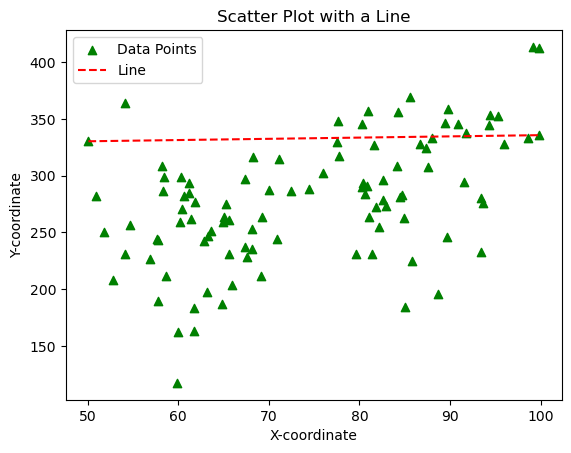

In [1]:
# Question 1
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/PRANAV/OneDrive/Desktop/Programming Analytics/scatter_data.csv')

x = data.iloc[:, 0]  # Assuming 'x' data is in the first column
y = data.iloc[:, 1]  # Assuming 'y' data is in the second column

plt.scatter(x, y, marker='^', color='green', label='Data Points')

min_x = x.min()
max_x = x.max()

plt.plot([min_x, max_x], [y[x.idxmin()], y[x.idxmax()]], linestyle='--', color='red', label='Line')

plt.title('Scatter Plot with a Line')

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

plt.legend()

plt.show()

In [2]:
#Question 2
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/PRANAV/OneDrive/Desktop/Programming Analytics/student_grades.csv')

In [3]:
selected_columns = data.iloc[:, [0, 1]]

# Specify the bins and labels
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

In [4]:
selected_columns['Letter Grade'] = pd.cut(selected_columns.iloc[:, 1], bins=bins, labels=labels, right=False)

In [5]:
# Count the number of students in each grade category
grade_counts = selected_columns['Letter Grade'].value_counts().reindex(labels)

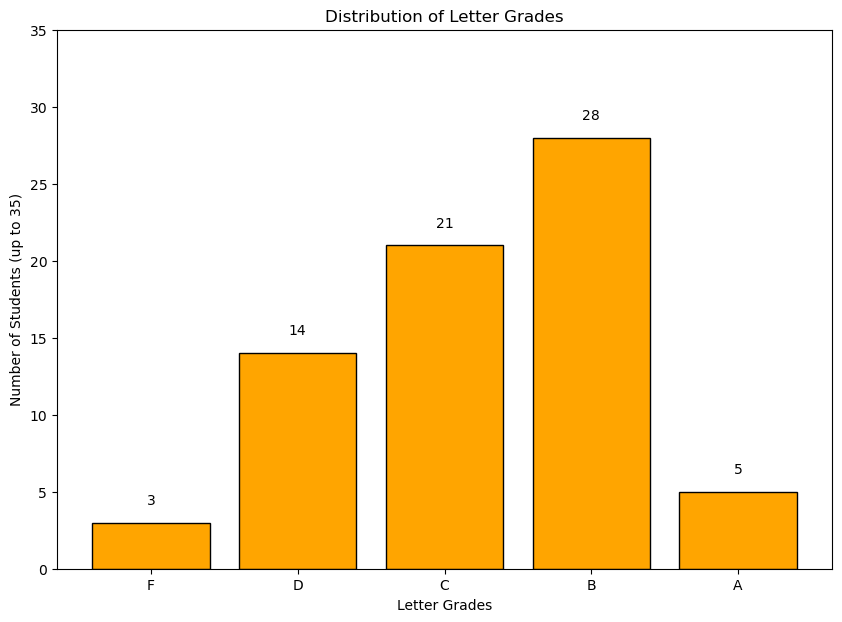

In [8]:
# Create the histogram
plt.figure(figsize=(10, 7))
plt.bar(labels, grade_counts, color='orange', edgecolor='black')

for i, count in enumerate(grade_counts):
    plt.text(i, min(count + 1, 35), str(count), ha='center', va='bottom')  # Reduce the gap to 2

plt.xlabel('Letter Grades')
plt.ylabel('Number of Students (up to 35)')  # Updated Y-axis label

plt.title('Distribution of Letter Grades')

plt.ylim(0, 35)

plt.show()

In [9]:
#Question 3
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/PRANAV/OneDrive/Desktop/Programming Analytics/solution_data.csv')

In [10]:
df['gap'] = df.groupby('% Problem')['Value'].transform(max) - df['Value']
df['gap_percent'] = (df['gap'] / df.groupby('% Problem')['Value'].transform(max)) * 100

In [11]:
heuristic_df = df[df['SolnMethod'] != 'optimal']

In [12]:
avg_gaps = heuristic_df.groupby('SolnMethod')['gap_percent'].mean().reset_index()

In [13]:
boxplot_data = heuristic_df.groupby('SolnMethod')['gap_percent'].apply(list).reset_index(name='gaps')

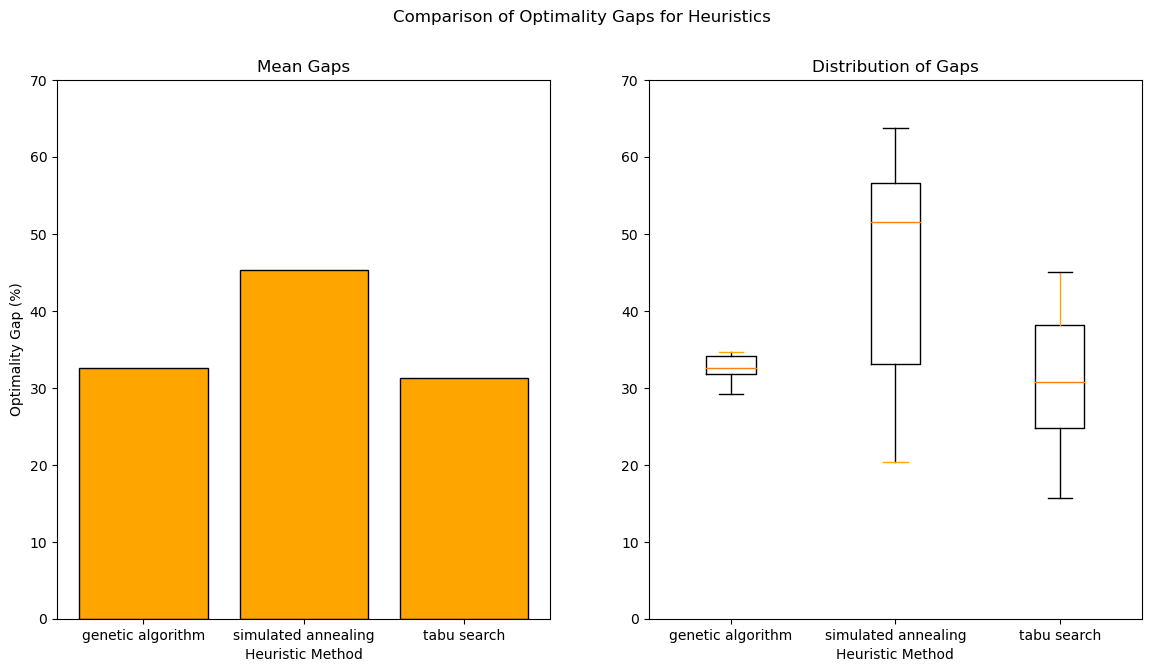

In [14]:
plt.figure(figsize=(14, 7))

# Barplot
plt.subplot(1, 2, 1)
plt.bar(avg_gaps['SolnMethod'], avg_gaps['gap_percent'], color='orange', edgecolor='black')
plt.xlabel('Heuristic Method')
plt.ylabel('Optimality Gap (%)')
plt.title('Mean Gaps')
plt.ylim(0, 70)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(boxplot_data['gaps'], labels=boxplot_data['SolnMethod'])
plt.xlabel('Heuristic Method')
plt.title('Distribution of Gaps')
plt.ylim(0, 70)


for median in plt.gca().lines[4::6]:
    median.set_color('orange')

plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.show()

In [ ]:
# Question 4

